In [1]:
pip install pandas scikit-learn


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

atp_data = pd.read_csv('atp_tennis.csv')
atp_data.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [4]:
numerical_cols = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']
categorical_cols = ['Tournament', 'Series', 'Court', 'Surface', 'Round', 'Player_1', 'Player_2', 'Winner', 'Score']


In [5]:

label_encoders = {col: LabelEncoder() for col in categorical_cols}

# for col in categorical_cols:
#     atp_data[col] = label_encoders[col].fit_transform(atp_data[col])


# Encode using frequency to not impose an arbitrary order
for col in categorical_cols:
    freq_encoding = atp_data[col].value_counts().to_dict()
    atp_data[col] = atp_data[col].map(freq_encoding)

numerical_transformer = StandardScaler()
atp_data[numerical_cols] = numerical_transformer.fit_transform(atp_data[numerical_cols])

categorical_transformer = StandardScaler()
atp_data[categorical_cols] = categorical_transformer.fit_transform(atp_data[categorical_cols])

processed_file_path = 'processed_atp_tennis_encoded.csv'
atp_data.to_csv(processed_file_path, index=False)

atp_data.head()

selected_columns = ['Tournament', 'Surface', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score']


data_subset = atp_data[selected_columns]

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_subset)


atp_data['Cluster'] = clusters


# plt.scatter(atp_data.iloc[:, 0], atp_data.iloc[:, 1], c=atp_data['Cluster'], cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-means Clustering')
# plt.colorbar(label='Cluster')
# plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


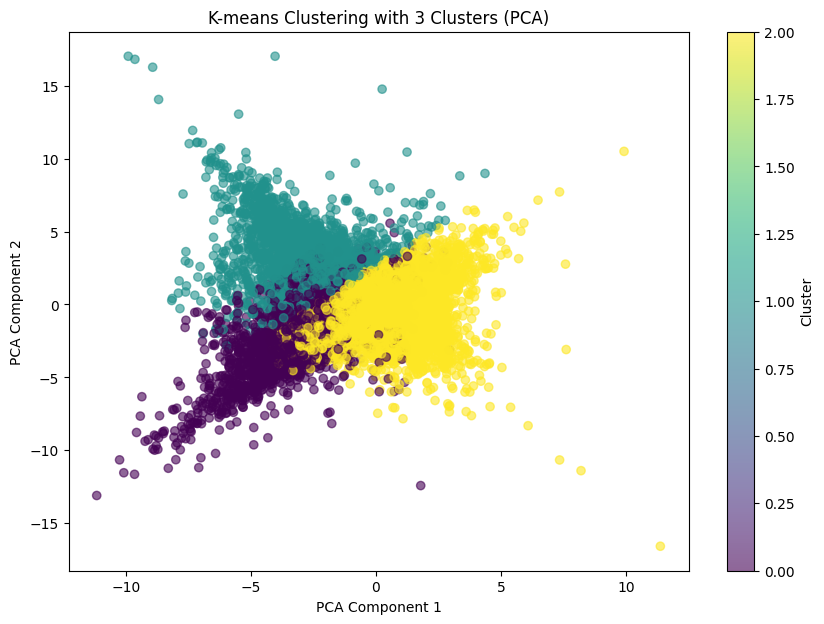

   Tournament        Date    Series     Court   Surface     Round  Best of  \
0    -0.57759  2000-01-03  0.216964  0.467617  0.820882  0.946853        3   
1    -0.57759  2000-01-03  0.216964  0.467617  0.820882  0.946853        3   
2    -0.57759  2000-01-03  0.216964  0.467617  0.820882  0.946853        3   
3    -0.57759  2000-01-03  0.216964  0.467617  0.820882  0.946853        3   
4    -0.57759  2000-01-03  0.216964  0.467617  0.820882  0.946853        3   

   Player_1  Player_2    Winner    Rank_1    Rank_2     Pts_1     Pts_2  \
0 -1.556797  1.548778 -0.722717 -0.128437  0.013991 -0.645564 -0.639561   
1 -0.574280 -1.412270 -0.372658 -0.198059 -0.696785 -0.645564 -0.639561   
2 -0.922514 -0.507850 -0.836557 -0.357194  5.719947 -0.645564 -0.639561   
3 -0.586717  2.397447  2.134675  0.110265 -0.104472 -0.645564 -0.639561   
4 -1.177471 -0.922892 -0.600339  0.050590  1.208491 -0.645564 -0.639561   

      Odd_1     Odd_2     Score  Cluster  
0 -1.277296 -1.296453 -0.096402      

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_subset)

plt.figure(figsize=(10, 7))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=atp_data['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title('K-means Clustering with 3 Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

print(atp_data.head())
